<a href="https://colab.research.google.com/github/saian65/Neural-Networks/blob/common/PyTorch_SinNet_2%5Ex_sin(2%5E_x).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

учебная нейронка восстанавливающая график 2^x*sin(2^-x)

In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

In [ ]:
import numpy as np

def target_func(x):
    left = 2**x
    right = np.sin(2**(-x))
    return left*right

In [ ]:
#make train dataset
X_train = torch.rand(20000)
X_train = X_train * 20.0 - 10.0

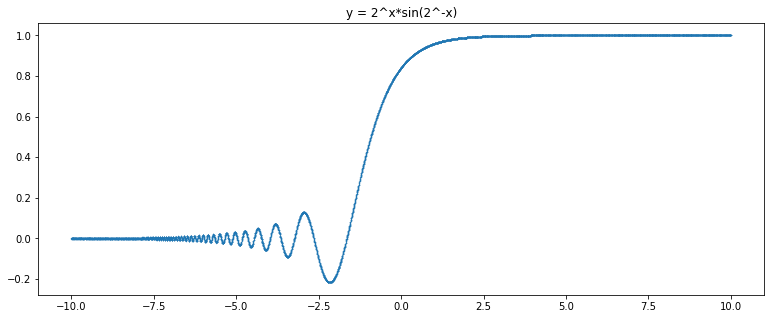

In [ ]:
y_train = target_func(X_train)

plt.plot(X_train.numpy(), y_train.numpy(), ".", ms=0.5)
plt.title('y = 2^x*sin(2^-x)');

In [ ]:
X_train.shape,y_train.shape

(torch.Size([20000]), torch.Size([20000]))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, 
    y_train, 
    test_size=0.5, 
    shuffle=True)

In [ ]:
X_train.shape, X_valid.shape, y_valid.shape, y_valid.shape

(torch.Size([10000]),
 torch.Size([10000]),
 torch.Size([10000]),
 torch.Size([10000]))

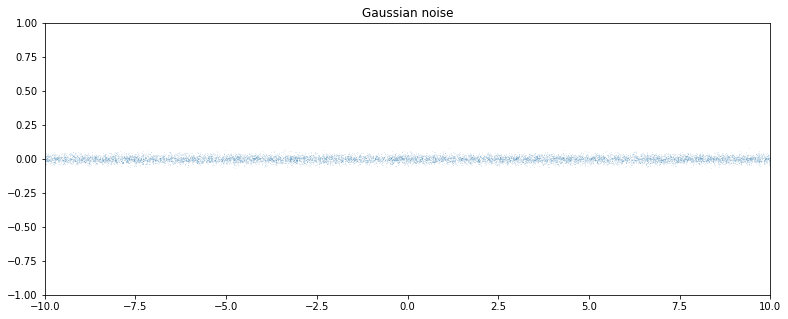

In [ ]:
#noise from normal distribution
noise = torch.randn(y_train.shape)/50

plt.plot(X_train.numpy(), noise.numpy(), '.',ms=0.09)
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

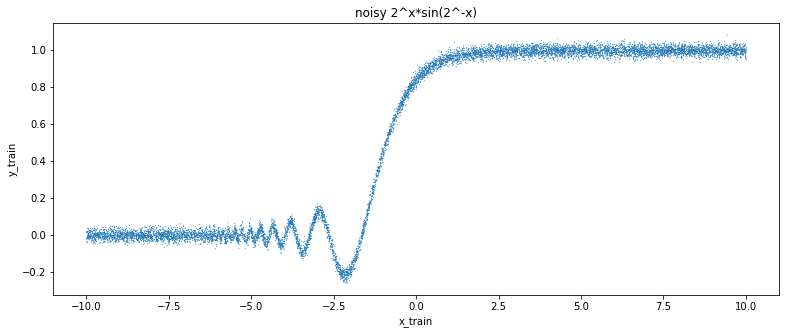

In [ ]:
#конечная обучающая выборка
y_train = y_train + noise
plt.plot(X_train.numpy(), y_train.numpy(), ".", ms=0.5)
plt.title('noisy 2^x*sin(2^-x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

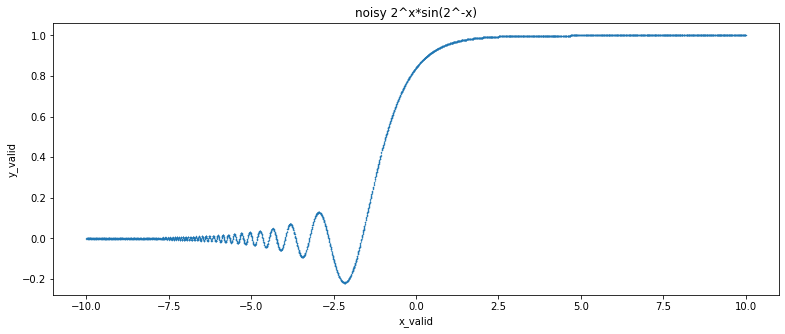

In [ ]:
#конечная валидационная выборка 
plt.plot(X_valid.numpy(), y_valid.numpy(), ".", ms=0.5)
plt.title('noisy 2^x*sin(2^-x)')
plt.xlabel('x_valid')
plt.ylabel('y_valid');

In [ ]:
X_train.unsqueeze_(1)
y_train.unsqueeze_(1);
X_valid.unsqueeze_(1)
y_valid.unsqueeze_(1);
X_train.shape, X_valid.shape, y_valid.shape, y_valid.shape

(torch.Size([10000, 1]),
 torch.Size([10000, 1]),
 torch.Size([10000, 1]),
 torch.Size([10000, 1]))

In [184]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Tanh()

        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.ReLU6()

        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)

        x = self.fc2(x)
        x = self.act2(x)

        x = self.fc3(x)
        return x

In [187]:
sine_net = SineNet(1200)

now let's find min of func loss

In [189]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.0001)

In [ ]:
def loss_MSE(pred, target):
    squares = (pred - target) ** 2
    print(squares.mean())
    return squares.mean()

In [ ]:
def loss_MAE(pred, target):
    squares = abs(pred - target)
    return squares.mean()

In [ ]:
from IPython.display import clear_output 
import time

In [196]:
for epoch_index in range(1000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(X_train)
    loss_val = loss_MAE(y_pred, y_train)
    print("epoh number "+str(epoch_index),loss_val.float())

    time.sleep(2)
    clear_output()

    loss_val.backward()
    optimizer.step()

epoh number 7 tensor(0.0280, grad_fn=<MeanBackward0>)


KeyboardInterrupt: ignored

In [ ]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), '.',ms=0.1, label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), '.',ms=0.1, c='g', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

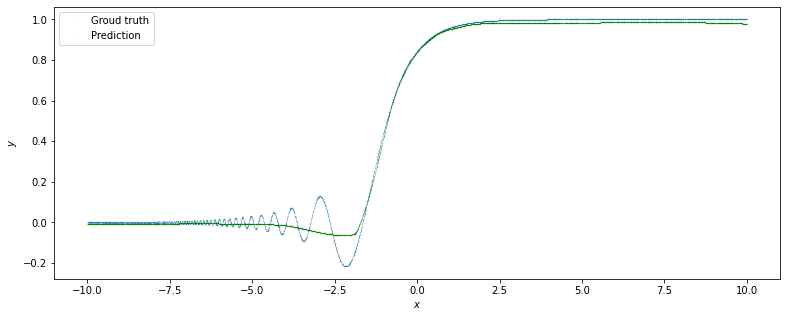

In [197]:
predict(sine_net, X_valid, y_valid)